In [1]:
import pandas as pd
import numpy as np
import scipy
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Extract for T-test

Objective: create a table displaying the mean/median gini coefficients for all simulation scenarios

Get gini coef stats: mead / median / std.dev / distribution

But first! Create a big df with all simulation outputs:
a) total views, average views, median views, stdev views, Q1, Q3, total ratings, avg

In [91]:
### Path parameters , select simulation
steps = 100
consumer = 'C3'
ifilter = 'Sociological'
simulations = 100
#path = 'C:/Users/andre/OneDrive - Harrisburg University/Data/Simulations/'
path = 'C:/Simulations/'
file_name = ifilter+str(steps)
sim_path = path+file_name+'/'+consumer+'/50'        #COGNITIVE EXTENSION    50 percent
percentage = '/100'

size = [[2000,400],[5000,1000],[10000,2000]]#,[20000,4000],[40000,8000]]

#Create dataframes from files
for consumer in ['C3']:#,'C30','C60']:
    df = load_basic(size[0],path,file_name,consumer,ifilter,simulations,steps,percentage)
    for s in size[1:]:
        dftemp = load_basic(s,path,file_name,consumer,ifilter,simulations,steps,percentage)
        df = df.append(dftemp,ignore_index=True)
    df.to_pickle('Results_F'+str(ifilter)+'_S'+str(steps)+'_C'+str(consumer)+'_P'+str(100))


    

C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in less_equal
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarn

In [87]:
len(df)

510

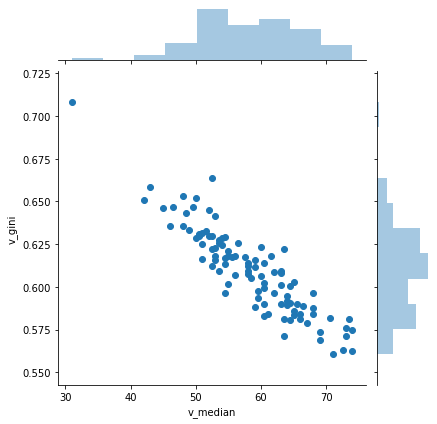

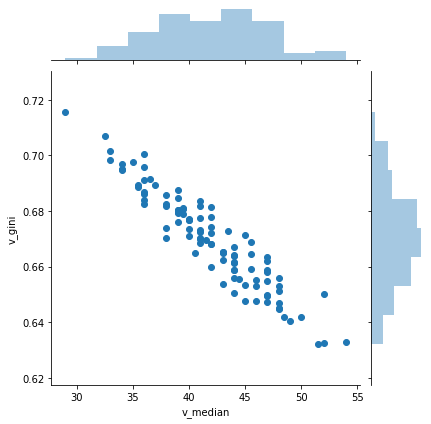

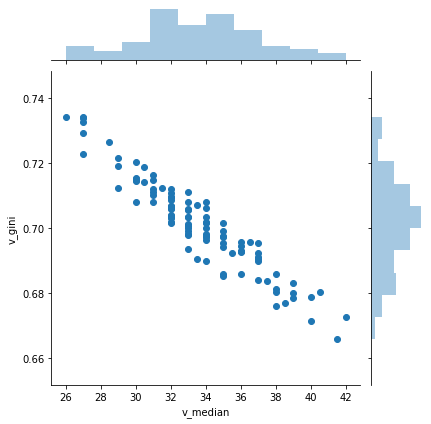

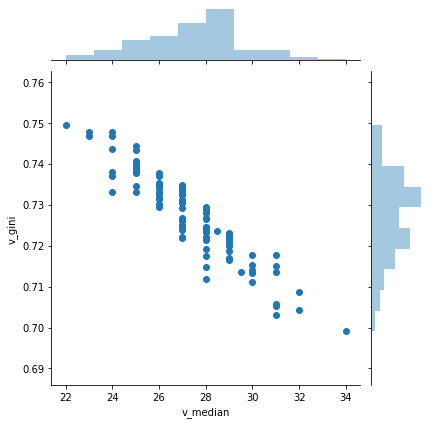

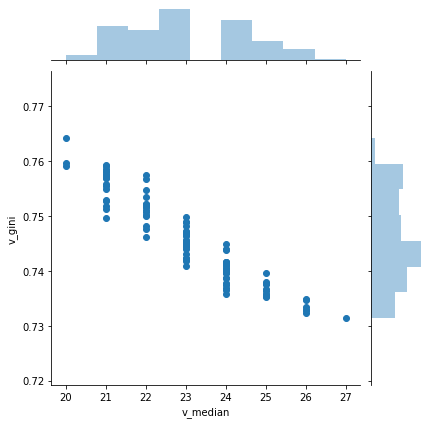

In [85]:
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==2000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==5000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==10000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==20000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==40000])
plt.show()

In [16]:
len(df00.values)

102

In [25]:
a = [float(len(i)) for i in df00[0]]

In [29]:
c,bins,gini = G(np.array(a))
gini

0.20740156296964232

In [78]:
def load_basic(s,path,file_name,consumer,ifilter,simulations,steps,percentage=''):
    df00 = pd.read_pickle(path+file_name+'/'+consumer+percentage+'/'+str([s[0],s[1],ifilter,simulations]))
    df0 = get_basics(df00)
    df0['u_size'] = [s[0]]*len(df0)
    df0['p_size'] = [s[1]]*len(df0)
    df0['filter'] = [ifilter]*len(df0)
    df0['u_cogni'] = [consumer]*len(df0)
    df0['steps'] = [steps]*len(df0)
    return df0

def get_basics(df):
    df2 = df#[M.columns[:-2]]
    viewstats = {'mean':[],'median':[],'std':[],'total':[],'minmax':[],'gini':[]}
    ratingstats = {'mean':[],'median':[],'std':[],'total':[],'minmax':[],'gini':[]}
    
    for i in df2.values:
        raw_views = []
        raw_rating_mean = []
        for j in i:
            raw_views.append(float(len(j)))
            raw_rating_mean.append(np.mean(j))       #Mind we take totals for views and mean for ratings
        #Get mean, median, stdev, q1, q3, 
        viewstats = update_stats(viewstats,raw_views)
        ratingstats = update_stats(ratingstats,raw_rating_mean)
        c,bins,gini = G(np.array(raw_views))
        viewstats['gini'].append(gini)
        c,bins,gini = G(np.array(raw_rating_mean))
        ratingstats['gini'].append(gini)
    
    dfv = pd.DataFrame()
    for k in ['mean','median','std','total','minmax','gini']:
        dfv['v_'+str(k)] = viewstats[str(k)]
    for k in ['mean','median','std','total','minmax','gini']:
        dfv['r_'+str(k)] = ratingstats[str(k)]
        
    return dfv
    
    
def plot_basic(dfv):
    gg = sns.jointplot(x='views',y='rating',data=dfv)
    plt.show()
    
    dfv = dfv.sort_values(by='rating',ascending=False)
    plt.plot(list(dfv.rating),linewidth=2,alpha=0.5,c='r',label='Rating')
    plt.legend()
    plt.show() 
    dfv = dfv.sort_values(by='views',ascending=False)
    plt.plot(list(dfv.views),linewidth=2,alpha=0.5,c='b',label='Views')
    plt.legend()
    plt.show()
    
    return dfv

def update_stats(dct,raw_list):
    dct['mean'].append(np.mean(raw_list))
    dct['median'].append(np.median(raw_list))
    dct['std'].append(np.std(raw_list))
    dct['total'].append(len(raw_list))
    dct['minmax'].append([min(raw_list),max(raw_list)])
    return dct
        
def get_gini(df2):
    views_sim = {}
    id_ = 0
    for vals in df2.values:
        t_views = []
        for i in vals:
            t_views.append(len(i))
        views_sim[id_] = t_views
        id_ += 1
    gini = [G(np.array(views_sim[k]))[-1] for k in range(0,len(df2))]
    return gini
    
def get_parameter_filter(ifilter,parameter,df):
    values = df[parameter]
    v_all = []
    for i in values:
        v_all = v_all + i
    all_values = v_all
    return all_values

def clean_values(values):
    cleaned = []
    dropped = 0
    
    for v in values:
        try:
            cleaned.append(float(v))
        except:
            dropped += 1
    print(dropped)
    return cleaned
        
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

def plot_gini(v):
    bins, result, gini_val = G(v)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(bins, result, label="observed")
    plt.plot(bins, bins, '--', label="perfect eq.")
    plt.xlabel("fraction of population")
    plt.ylabel("fraction of wealth")
    plt.title("GINI: %.4f" %(gini_val))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.hist(v, bins=20)

In [51]:
import scipy

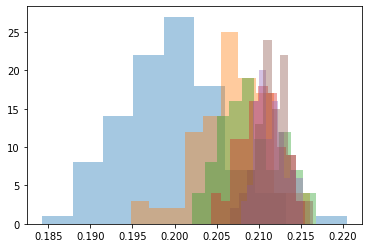

In [64]:
for i in [df00,df11,df22,df33,df44,df55]:
    plt.hist(get_gini(i),alpha=0.4,bins=10)
    

In [65]:
g1 = get_gini(df11)
g2 = get_gini(df22)
g3 = get_gini(df33)
g4 = get_gini(df44)
g5 = get_gini(df55)

In [53]:
scipy.stats.ttest_rel(g1,g2)

Ttest_relResult(statistic=-4.055391679041611, pvalue=9.864043321732332e-05)

In [54]:
scipy.stats.ttest_rel(g2,g3)

Ttest_relResult(statistic=-2.7035990579881646, pvalue=0.008049566565141046)

In [66]:
scipy.stats.ttest_rel(g3,g4)

Ttest_relResult(statistic=-3.732556015406792, pvalue=0.0003135845420618168)

In [67]:
scipy.stats.ttest_rel(g4,g5)

Ttest_relResult(statistic=-1.4146468959484344, pvalue=0.1602476150424726)

In [68]:
ifilter = 'Cognitive'
cdf00 = pd.read_pickle('C:/Simulations/'+str([2000,400,ifilter,simulations]))
cdf11 = pd.read_pickle('C:/Simulations/'+str([5000,1000,ifilter,simulations]))
cdf22 = pd.read_pickle('C:/Simulations/'+str([10000,2000,ifilter,simulations]))
cdf33 = pd.read_pickle('C:/Simulations/'+str([20000,4000,ifilter,simulations]))
cdf44 = pd.read_pickle('C:/Simulations/'+str([40000,8000,ifilter,simulations]))


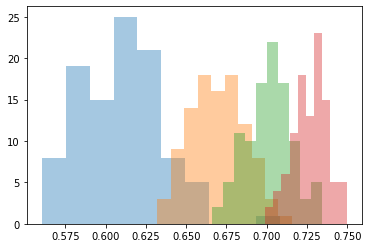

In [70]:
for i in [cdf00,cdf11,cdf22,cdf33]:
    plt.hist(get_gini(i),alpha=0.4,bins=10)

In [59]:
cg1 = get_gini(cdf11)
cg2 = get_gini(cdf22)
cg3 = get_gini(cdf33)

C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


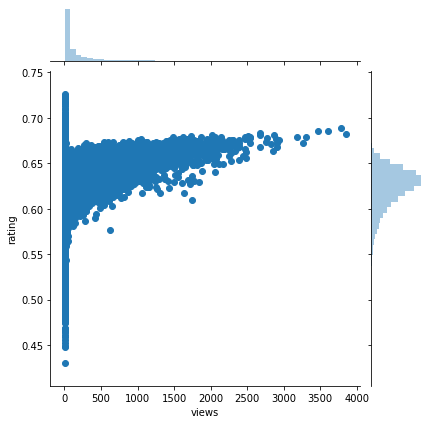

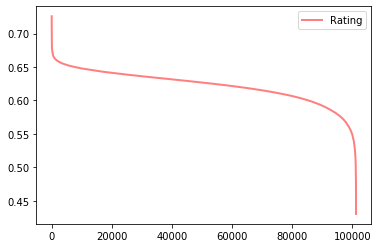

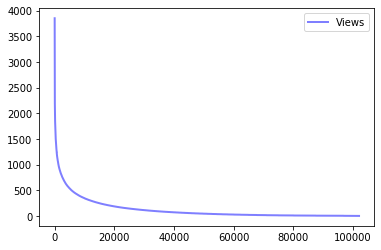

In [60]:
cdf1 = get_basics(cdf11)

In [ ]:
df1

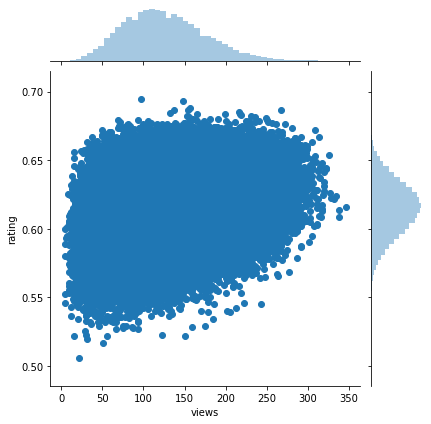

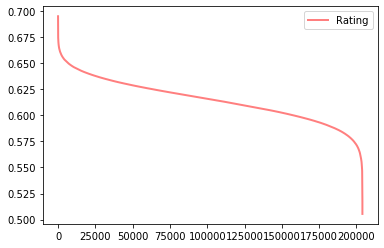

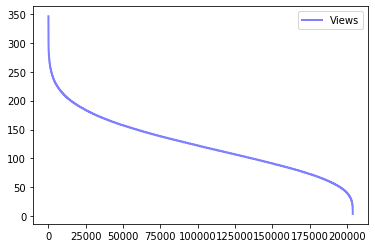

In [27]:
df2 = get_basics(df22)

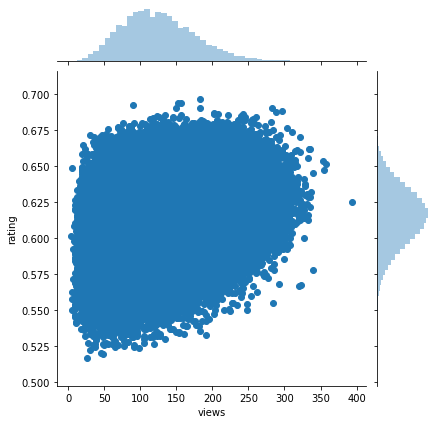

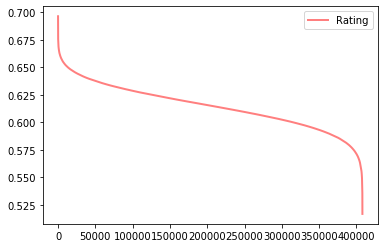

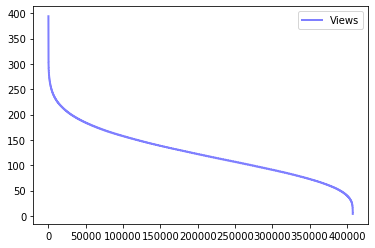

In [28]:
df3 = get_basics(df33)

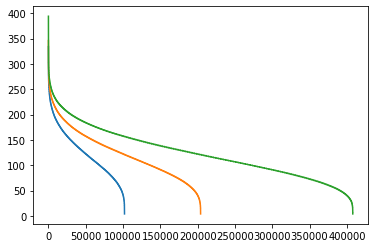

In [33]:
plt.plot(list(df.views))
plt.plot(list(df2.views))
plt.plot(list(df3.views))


In [6]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

def plot_gini(v):
    bins, result, gini_val = G(v)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(bins, result, label="observed")
    plt.plot(bins, bins, '--', label="perfect eq.")
    plt.xlabel("fraction of population")
    plt.ylabel("fraction of wealth")
    plt.title("GINI: %.4f" %(gini_val))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.hist(v, bins=20)

In [7]:
plot_gini(df.views)
plot_gini(df2.views)
plot_gini(df3.views)

NameError: name 'df' is not defined

In [13]:
G(df1.views)[-1]

0.20554719387365095

In [31]:
views_sim = {}
id_ = 0
for vals in df11.values:
        t_views = []
        for i in vals:
            t_views.append(len(i))
        views_sim[id_] = t_views
        id_ += 1
            

In [32]:
gini = [G(np.array(views_sim[k]))[-1] for k in range(0,len(df11))]

In [33]:
gini

[0.2077968790053832,
 0.20532536329300302,
 0.20623247341551687,
 0.2061027093890907,
 0.20692321237053984,
 0.20588122360168953,
 0.2025967694238192,
 0.1999543400942036,
 0.2082715495844609,
 0.2057965906177903,
 0.21142166598865714,
 0.19532872939204027,
 0.20922331651853637,
 0.2039480111793582,
 0.21055226667092183,
 0.20977845500889533,
 0.20677327562021564,
 0.19481176969280115,
 0.202342772842436,
 0.20168859281269724,
 0.2083650917672572,
 0.21060547997700704,
 0.20713898758783325,
 0.20678279377170375,
 0.2056677080829929,
 0.20789941254622,
 0.21099448311255092,
 0.20372154604476073,
 0.20691051068314645,
 0.1953661752367254,
 0.2078450955169741,
 0.20326193028203943,
 0.20949884336153554,
 0.205343657852468,
 0.20594923046172298,
 0.20932089905299536,
 0.20549420673442137,
 0.2118934797573118,
 0.20201114727355599,
 0.20807160904467964,
 0.2077933702010677,
 0.21106978080748412,
 0.20492710106297563,
 0.20758378128339683,
 0.2067459019662585,
 0.20935750061909383,
 0.207768

0
0


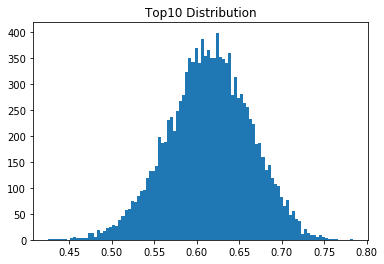

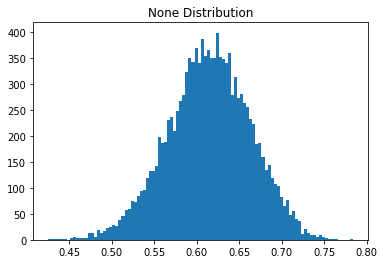

In [10]:
top10_r = get_parameter_filter(ifilter,0,df)
top10_r = clean_values(top10_r)
top10_r.sort(reverse=True)

none_r = get_parameter_filter(ifilter,0,df)
none_r = clean_values(none_r)
none_r.sort(reverse=True)

top10_r = [i for i in top10_r if i < 400]
plt.title('Top10 Distribution')
plt.hist(top10_r,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_r,bins=100)
plt.show()

# Views

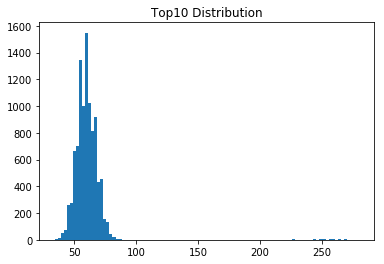

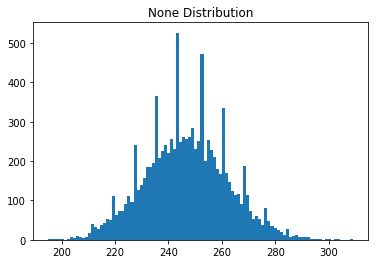

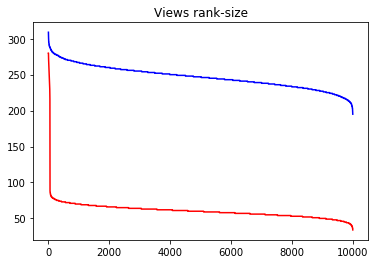

In [75]:
top10_v = get_parameter_filter(ifilter,1,df_top10)
top10_v.sort(reverse=True)

none_v = get_parameter_filter(ifilter,1,df_none)
none_v.sort(reverse=True)

plt.title('Top10 Distribution')
plt.hist(top10_v,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_v,bins=100)
plt.show()

none_v.sort(reverse=True)
top10_v.sort(reverse=True)
plt.plot(none_v,label='None',c='b')
plt.plot(top10_v,label='None',c='r')
plt.title('Views rank-size')
plt.show()

# T-test before Views ranking fix.

In [69]:
#For Ratings
var10 = np.var(top10_r)
varN = np.var(none_r)

In [70]:
var10, varN

(3412.9609159084025, 60354.49047292651)

In [71]:
#Then, calculate T-test for two independent sasmples, identical variances.
stats.ttest_ind(none_r,top10_r,axis=0,equal_var=False)

Ttest_indResult(statistic=-1.1689897066292625, pvalue=0.2424328103853359)

In [72]:
from scipy import stats